<a href="https://colab.research.google.com/github/niranjana2222/Discovering-Potential-Skin-Cancer-Drugs-/blob/main/models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

#Get data
cancer = pd.read_csv('/content/descriptors2.csv')
#cancer['label'] = np.zeros((2525, 1)).tolist()
cancer['label'] = 0
print("Size", cancer.shape)

drugs = pd.read_csv('/content/descriptors3.csv')
#drugs['label'] = np.ones((893, 1)).tolist()
drugs['label'] = 1
print("Size", drugs.shape)

data = pd.concat([cancer, drugs])

#Clean data
data = data.dropna()
#del data['smiles']
#data = data.drop('smiles',axis=1)
print("Size", data.shape)


Size (2525, 1876)
Size (893, 1876)
Size (2060, 1876)


             nAcid        ALogP       ALogp2          AMR         apol  \
count  2060.000000  2060.000000  2060.000000  2060.000000  2060.000000   
mean      0.242233    -0.156340     3.168531    92.164233    50.927320   
std       0.630350     1.773588     7.948523    33.245534    18.708404   
min       0.000000   -12.994800     0.000002    12.507200     8.231172   
25%       0.000000    -1.126175     0.256391    69.551050    37.535344   
50%       0.000000    -0.041900     1.149184    92.772800    51.195067   
75%       0.000000     1.009250     3.420650   112.729900    62.099119   
max       6.000000     7.416100   168.864827   322.969800   158.877720   

        naAromAtom    nAromBond        nAtom   nHeavyAtom           nH  ...  \
count  2060.000000  2060.000000  2060.000000  2060.000000  2060.000000  ...   
mean      8.943204     9.115049    44.225243    23.643689    20.581553  ...   
std       6.571102     6.764682    16.927487     8.505932     9.645723  ...   
min       0.00000

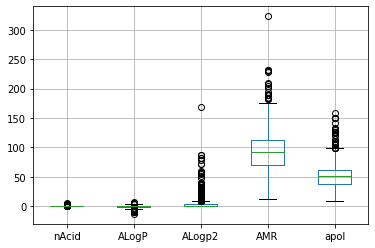

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

###Analyze Data####
print(data.describe())
print(data.head())
print("Size", data.shape)

corr = data.corr().abs()
corr2 = corr.unstack()
print(corr2.sort_values(kind="quicksort", ascending=False))
print("Corr\n", corr2.value_counts())

print((data.max()-data.min()).sort_values(kind="quicksort", ascending=False))
print("Range\n", (data.max()-data.min()).value_counts())

print(data.isnull().sum().sort_values(kind="quicksort", ascending=False))
print("Null\n", data.isnull().sum().value_counts().sort_values(kind="quicksort"))

corr3 = corr2.value_counts().rename_axis('unique_values').to_frame('counts')
print(corr3)

boxplot_nat = data.boxplot(column=['nAcid', 'ALogP', 'ALogp2' , 'AMR' , 'apol'])

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
labels = data['label']
print(labels)
del data['label']
print(data)
X_train, X_test, y_train, y_test = train_test_split(data, labels, random_state=42)


0      0
1      0
2      0
3      0
4      0
      ..
883    1
885    1
886    1
890    1
892    1
Name: label, Length: 2060, dtype: int64
     nAcid   ALogP     ALogp2       AMR       apol  naAromAtom  nAromBond  \
0        0  0.3167   0.100299   93.1538  59.369790           0          0   
1        0 -0.1076   0.011578   12.5551   8.322758           0          0   
2        0 -6.1574  37.913575   71.4075  70.194478           0          0   
3        0  0.1474   0.021727  111.3365  59.298239          12         12   
4        0  2.0343   4.138376  111.6621  52.737102          17         17   
..     ...     ...        ...       ...        ...         ...        ...   
883      0 -0.0191   0.000365  113.4486  65.427790          11         11   
885      0  1.4042   1.971778  107.7644  54.011446          12         12   
886      0 -2.2812   5.203873   54.0251  32.407516           5          5   
890      0 -1.0029   1.005808   71.6344  40.077481           9         10   
892      0  1.

MLP 0.429126213592233


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


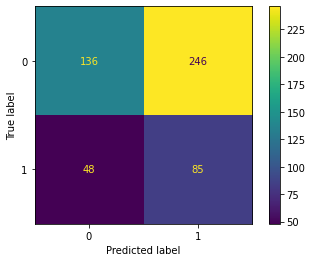

              precision    recall  f1-score   support

           0       0.74      0.36      0.48       382
           1       0.26      0.64      0.37       133

    accuracy                           0.43       515
   macro avg       0.50      0.50      0.42       515
weighted avg       0.61      0.43      0.45       515



In [33]:
#MLP
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import plot_confusion_matrix, classification_report

mlp = MLPClassifier()
mlp.fit(X_train, y_train)
#mlp.predict_proba(X_test)
predictions = mlp.predict(X_test)
print("MLP", accuracy_score(y_test, predictions))

plot_confusion_matrix(mlp, X_test, y_test)  
plt.show()

print(classification_report(y_test,predictions))

NB 0.28932038834951457


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


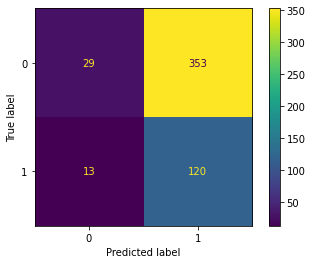

              precision    recall  f1-score   support

           0       0.69      0.08      0.14       382
           1       0.25      0.90      0.40       133

    accuracy                           0.29       515
   macro avg       0.47      0.49      0.27       515
weighted avg       0.58      0.29      0.20       515



In [37]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
predictions = gnb.predict(X_test)
print("NB", accuracy_score(y_test, predictions))

plot_confusion_matrix(gnb, X_test, y_test)  
plt.show()

print(classification_report(y_test,predictions))

#print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

In [43]:
#train decision tree classifier
from sklearn import tree
decision_tree = tree.DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

#train extra trees classifier
from sklearn.ensemble import ExtraTreesClassifier
extra_trees = ExtraTreesClassifier()
extra_trees.fit(X_train,y_train)

#train random forest classifier
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train,y_train)

RandomForestClassifier()

Decision Tree 0.49902912621359224


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


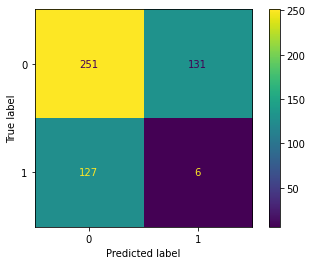

              precision    recall  f1-score   support

           0       0.66      0.66      0.66       382
           1       0.04      0.05      0.04       133

    accuracy                           0.50       515
   macro avg       0.35      0.35      0.35       515
weighted avg       0.50      0.50      0.50       515



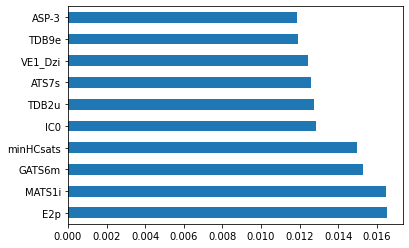

Feature: 0, Score: 0.01652


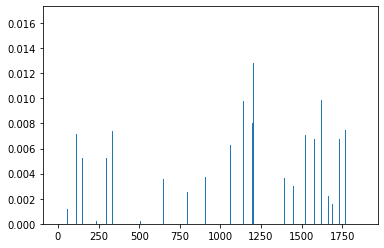

Feature: 1, Score: 0.01646


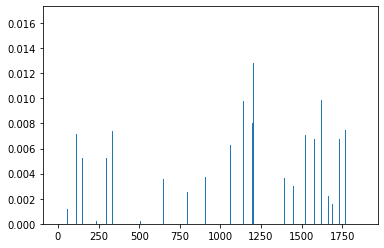

Feature: 2, Score: 0.01529


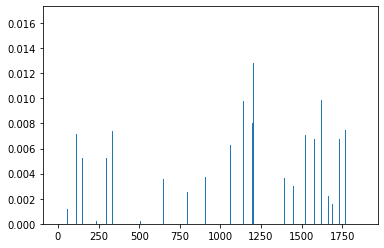

Feature: 3, Score: 0.01498


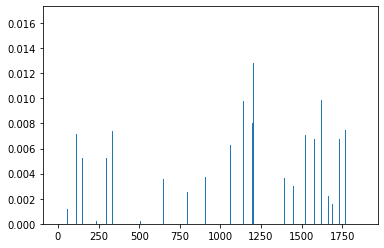

Feature: 4, Score: 0.01285


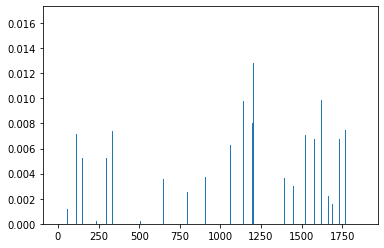

Feature: 5, Score: 0.01274


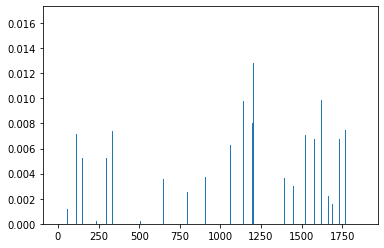

Feature: 6, Score: 0.01257


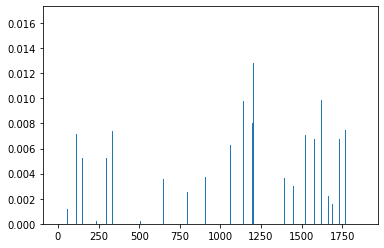

Feature: 7, Score: 0.01243


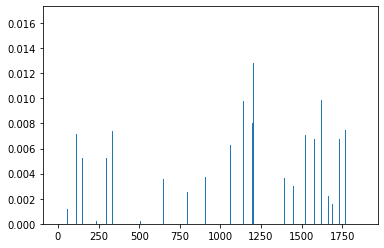

Feature: 8, Score: 0.01191


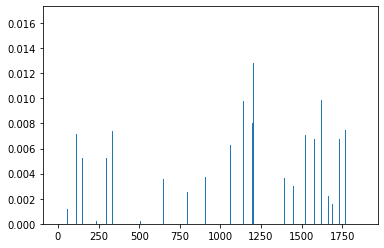

Feature: 9, Score: 0.01185


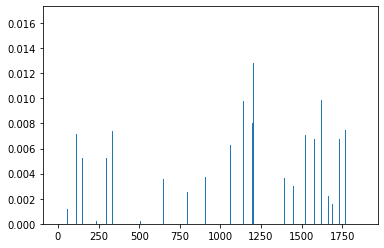

Extra Trees 0.541747572815534


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


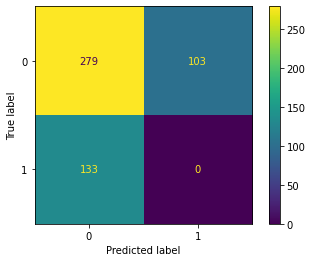

              precision    recall  f1-score   support

           0       0.68      0.73      0.70       382
           1       0.00      0.00      0.00       133

    accuracy                           0.54       515
   macro avg       0.34      0.37      0.35       515
weighted avg       0.50      0.54      0.52       515



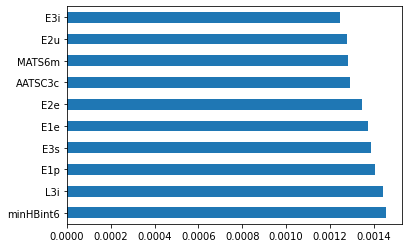

Feature: 0, Score: 0.00145


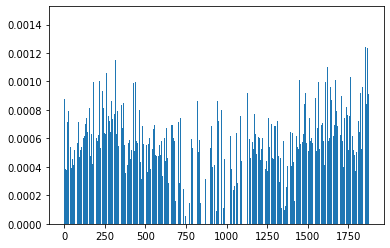

Feature: 1, Score: 0.00144


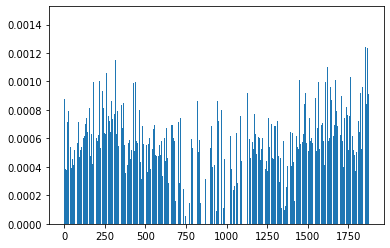

Feature: 2, Score: 0.00140


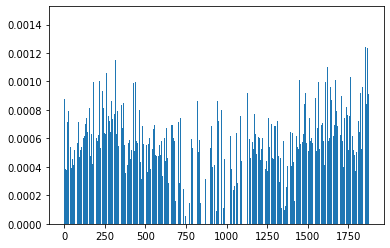

Feature: 3, Score: 0.00139


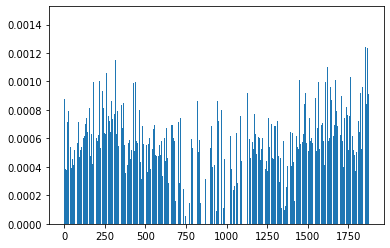

Feature: 4, Score: 0.00137


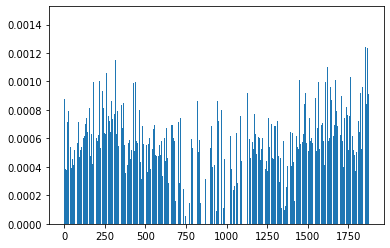

Feature: 5, Score: 0.00135


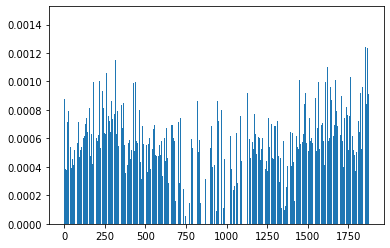

Feature: 6, Score: 0.00129


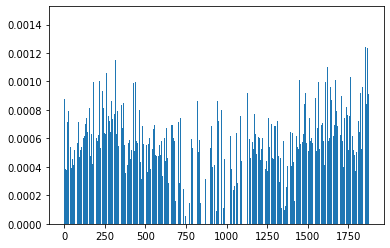

Feature: 7, Score: 0.00128


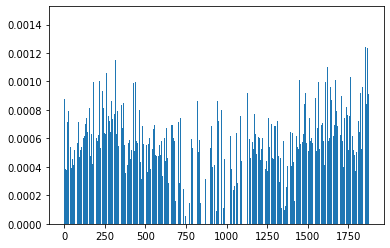

Feature: 8, Score: 0.00128


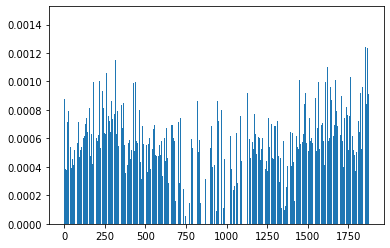

Feature: 9, Score: 0.00124


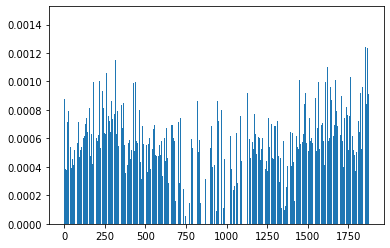

Random Forest 0.541747572815534


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


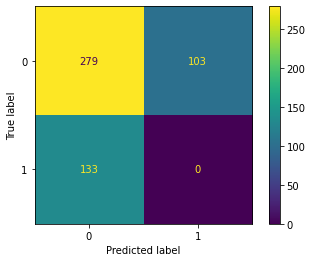

              precision    recall  f1-score   support

           0       0.68      0.73      0.70       382
           1       0.00      0.00      0.00       133

    accuracy                           0.54       515
   macro avg       0.34      0.37      0.35       515
weighted avg       0.50      0.54      0.52       515



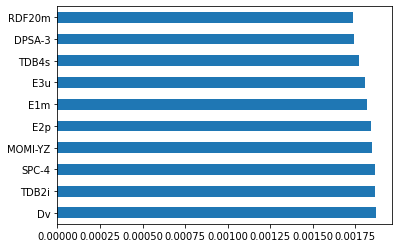

Feature: 0, Score: 0.00187


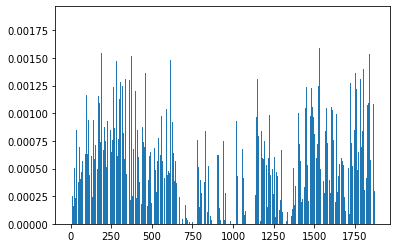

Feature: 1, Score: 0.00187


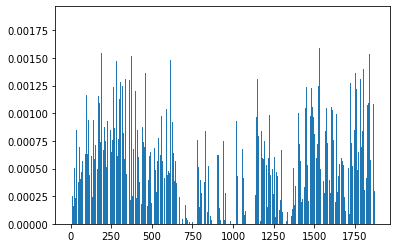

Feature: 2, Score: 0.00187


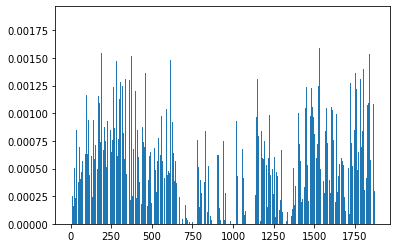

Feature: 3, Score: 0.00185


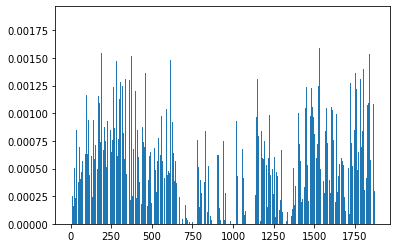

Feature: 4, Score: 0.00184


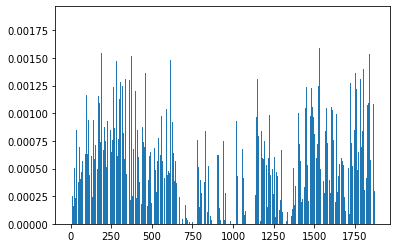

Feature: 5, Score: 0.00182


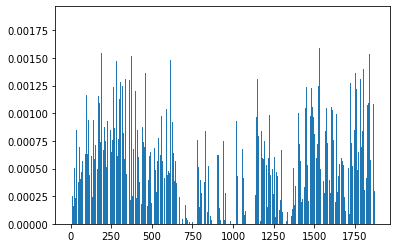

Feature: 6, Score: 0.00181


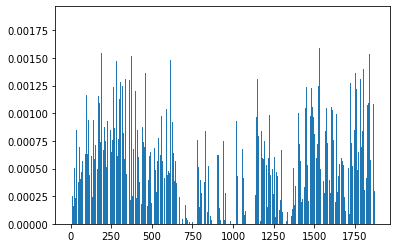

Feature: 7, Score: 0.00177


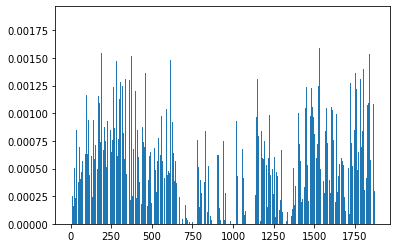

Feature: 8, Score: 0.00174


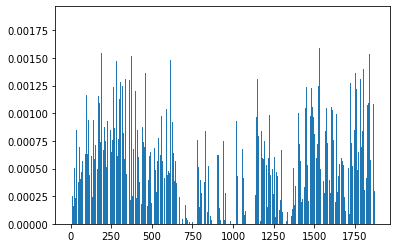

Feature: 9, Score: 0.00174


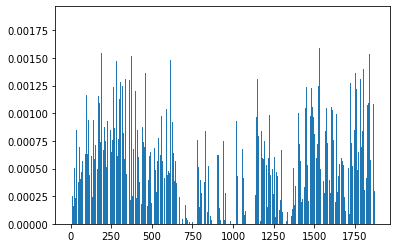

In [44]:
#evaluate tree models 
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

def evaluate(tree, name):
  y_pred = tree.predict(X_test)
  print(name, accuracy_score(y_pred, y_test))

  plot_confusion_matrix(tree, X_test, y_test)  
  plt.show()
  
  print(classification_report(y_test,y_pred))

  feat_importances = pd.Series(tree.feature_importances_, index=data.columns)
  feat_importances.nlargest(10).plot(kind='barh')
  plt.show()

  for i,v in enumerate(feat_importances.nlargest(10)):
    print('Feature: %0d, Score: %.5f' % (i,v))
    plt.bar([x for x in range(len(feat_importances))], feat_importances)
    plt.show()

evaluate(decision_tree, "Decision Tree")
evaluate(extra_trees, "Extra Trees")
evaluate(random_forest, "Random Forest")

In [ ]:
#finetuning best model

In [ ]:
#make predictions 
coconut = pd.read_csv('/content/coconut.csv')
predictions = model.predict(coconut)
prob = model.predict_proba(coconut)

print(predictions.value_count())

results = pd.concat([coconut[0], predictions, prob])
print(results)
print(results.describe())

print(results.value_count())

for row in results:
  if row[1] == 0:
    print(row)
    
